In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import zipfile
import os
from tqdm import tqdm
import cv2 as opencv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [4]:
from zipfile import ZipFile

In [14]:
import zipfile
from tqdm import tqdm

# Zip dosyasının konumu
zip_dosya_konumu = "/content/drive/MyDrive/Tumor.zip"
# Çıkartılacak klasör konumu
hedef_klasor = "/content/veriseti"

# Zip dosyasını aç
with zipfile.ZipFile(zip_dosya_konumu, 'r') as zip_ref:
    # İlerleme çubuğu için dosya sayısını al
    dosya_sayısı = len(zip_ref.infolist())

    # tqdm kullanarak ilerleme çubuğunu oluştur
    with tqdm(total=dosya_sayısı, desc="Dosyalar çıkartılıyor") as pbar:
        # Tüm içeriği hedef klasöre çıkart
        for dosya in zip_ref.infolist():
            zip_ref.extract(dosya.filename, hedef_klasor)
            pbar.update(1)

print("Dosya başarıyla çıkartıldı.")


Dosyalar çıkartılıyor: 100%|██████████| 1311/1311 [00:00<00:00, 3685.91it/s]

Dosya başarıyla çıkartıldı.


In [15]:
folder = '/content/veriseti/Tumor'
files = os.listdir(folder)
print(len(files))

1311


In [16]:
images = []
for file in tqdm(range(len(files))):
    file = str(file)+'.jpg'
    fullpath = os.path.join(folder,file)
    img = opencv.imread(fullpath)
    img = opencv.cvtColor(img,opencv.COLOR_RGB2GRAY) #
    img = opencv.resize(img, (400,400))
    img_normalized = img / 255.0  # Normalize pixel values to range [0, 1]

    images.append(img_normalized)


100%|██████████| 1311/1311 [00:02<00:00, 442.06it/s]


In [17]:
images = np.asarray(images)

In [19]:
print(type(images))

<class 'numpy.ndarray'>


In [24]:
etiketler = pd.read_excel ('/content/drive/MyDrive/TumorData.xlsx')
etiketler.drop(etiketler.columns[0], axis=1, inplace=True)
etiketler

,Sinif_glioma,Sinif_meningioma,Sinif_notumor,Sinif_pituitary
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1306,0,0,0,1
1307,0,0,0,1
1308,0,0,0,1
1309,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split

# Veri setini eğitim ve validasyon/test setleri olarak ayırma
# X: görüntüler, y: etiketler
X_egitim, X_validasyon_test, y_egitim, y_validasyon_test = train_test_split(images, etiketler, test_size=0.25, random_state=2021)

# Validasyon/test setini validasyon ve test setlerine ayırma
X_validasyon, X_test, y_validasyon, y_test = train_test_split(X_validasyon_test, y_validasyon_test, test_size=0.4, random_state=2021)

# Her bir veri setinin boyutunu kontrol etme
print("Eğitim veri seti boyutu:", X_egitim.shape)
print("Validasyon veri seti boyutu:", X_validasyon.shape)
print("Test veri seti boyutu:", X_test.shape)


Eğitim veri seti boyutu: (983, 400, 400)
Validasyon veri seti boyutu: (196, 400, 400)
Test veri seti boyutu: (132, 400, 400)


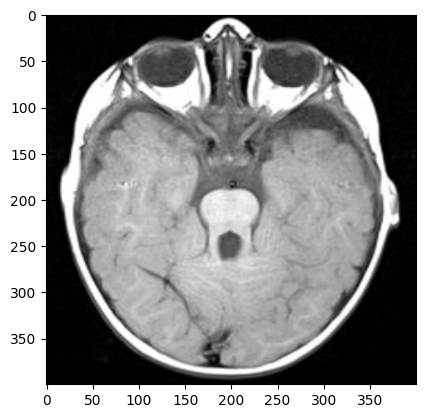

In [26]:
plt.imshow(X_egitim[4],cmap= 'gray')

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import metrics


In [34]:
num_classes = 6


siniragi  = Sequential([Conv2D(32,(3,3),activation = 'relu', input_shape =(400,400,1)),
                        MaxPooling2D((2,2)),
                        Conv2D(64,(3,3),activation = 'relu'),
                        MaxPooling2D((2,2)),
                        Conv2D(128, (3,3),activation = 'relu'),
                        MaxPooling2D((2,2)),
                        Flatten(),
                        Dense(128,activation = 'relu'),
                        Dense(4,activation ='softmax')
                        ])


siniragi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[metrics.Precision(), metrics.Recall(), 'categorical_accuracy', 'accuracy'])


In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Model ağırlıklarını kaydetmek için kontrol noktası oluşturma
checkpoint_path = "/content/drive/MyDrive/Agilirliklar/siniragi_agirliklari_{epoch:02d}.h5"
checkpoint = ModelCheckpoint(checkpoint_path, save_weights_only=True)

# Modeli eğitmek ve kontrol noktası geri çağırımını kullanmak
history = siniragi.fit(
    X_egitim,
    y_egitim,
    epochs=10,
    batch_size=8,
    validation_data=(X_validasyon, y_validasyon),
    callbacks=[checkpoint]
)


Epoch 1/10
123/123 [==============================] - 9s 64ms/step - loss: 1.0625 - precision_2: 0.7097 - recall_2: 0.4028 - categorical_accuracy: 0.5931 - accuracy: 0.5931 - val_loss: 0.6206 - val_precision_2: 0.7836 - val_recall_2: 0.6837 - val_categorical_accuracy: 0.7296 - val_accuracy: 0.7296
Epoch 2/10
123/123 [==============================] - 9s 70ms/step - loss: 0.5265 - precision_2: 0.8267 - recall_2: 0.7620 - categorical_accuracy: 0.8026 - accuracy: 0.8026 - val_loss: 0.6099 - val_precision_2: 0.7697 - val_recall_2: 0.6990 - val_categorical_accuracy: 0.7653 - val_accuracy: 0.7653
Epoch 3/10
123/123 [==============================] - 8s 68ms/step - loss: 0.2710 - precision_2: 0.9045 - recall_2: 0.8861 - categorical_accuracy: 0.8962 - accuracy: 0.8962 - val_loss: 0.6830 - val_precision_2: 0.7553 - val_recall_2: 0.7245 - val_categorical_accuracy: 0.7296 - val_accuracy: 0.7296
Epoch 4/10
123/123 [==============================] - 6s 49ms/step - loss: 0.1538 - precision_2: 0.9520

In [37]:
print(history.history.keys())


dict_keys(['loss', 'precision_2', 'recall_2', 'categorical_accuracy', 'accuracy', 'val_loss', 'val_precision_2', 'val_recall_2', 'val_categorical_accuracy', 'val_accuracy'])


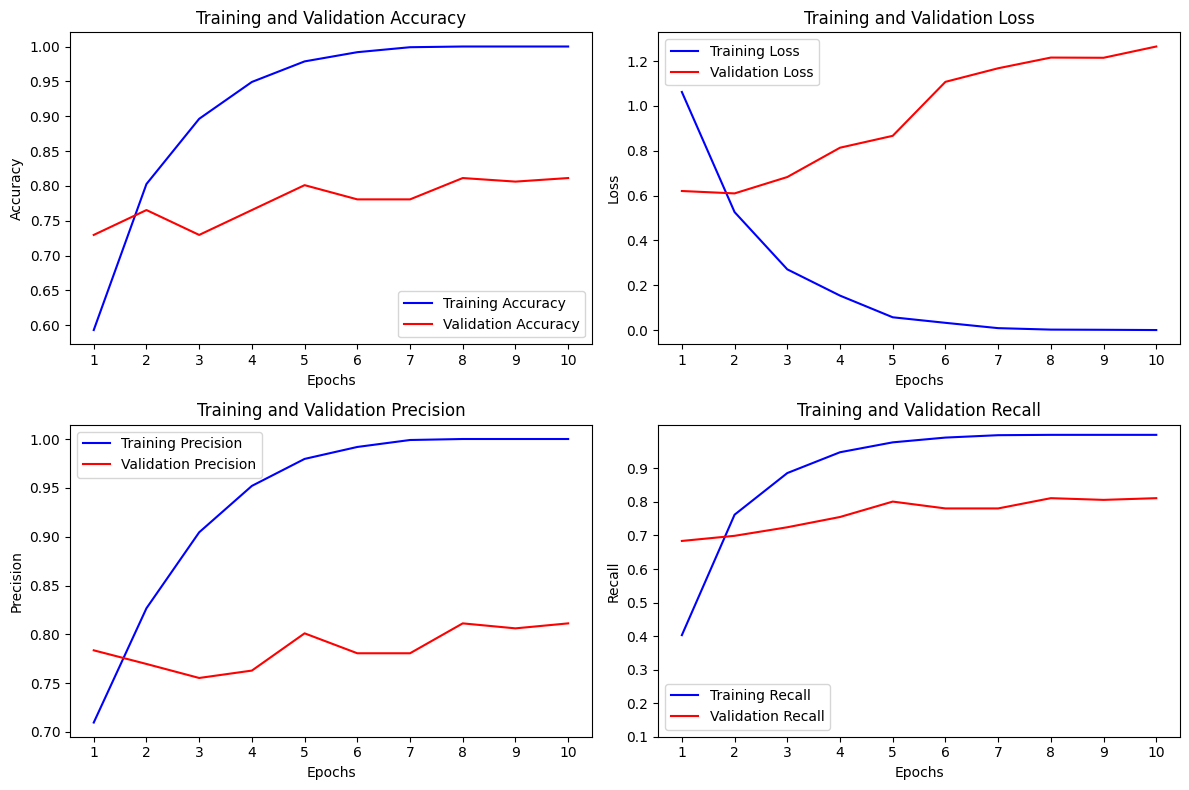

In [39]:
import matplotlib.pyplot as plt
import numpy as np
# Get the training and validation metrics
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
train_precision = history.history['precision_2']
train_recall = history.history['recall_2']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_precision = history.history['val_precision_2']
val_recall = history.history['val_recall_2']

# Plot the metrics
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly

# Loss plot
plt.subplot(2, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly

# Precision plot
plt.subplot(2, 2, 3)
plt.plot(epochs, train_precision, 'b', label='Training Precision')
plt.plot(epochs, val_precision, 'r', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly

# Recall plot
plt.subplot(2, 2, 4)
plt.plot(epochs, train_recall, 'b', label='Training Recall')
plt.plot(epochs, val_recall, 'r', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.xticks(epochs)  # Set the x-axis ticks explicitly
plt.yticks(np.arange(0.1, 1.0, 0.1))

plt.tight_layout()
plt.show()


In [42]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import metrics

# Load the model architecture
siniragi  = Sequential([Conv2D(32,(3,3),activation = 'relu', input_shape =(400,400,1)),
                        MaxPooling2D((2,2)),
                        Conv2D(64,(3,3),activation = 'relu'),
                        MaxPooling2D((2,2)),
                        Conv2D(128, (3,3),activation = 'relu'),
                        MaxPooling2D((2,2)),
                        Flatten(),
                        Dense(128,activation = 'relu'),
                        Dense(4,activation ='softmax')
                        ])

# Compile the model (you can skip this if you are loading an already compiled model)
siniragi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[metrics.Precision(), metrics.Recall(), 'categorical_accuracy', 'accuracy'])

# Load the trained weights
siniragi.load_weights('/content/drive/MyDrive/Agilirliklar/siniragi_agirliklari_07.h5')


In [44]:
from keras.preprocessing import image
import numpy as np

# Define the path to the image
image_path = '/content/Te-me_0010.jpg'

# Load the image and preprocess it
img = image.load_img(image_path)
img = opencv.imread(image_path) # Load as grayscale and resize to match model input shape
img = opencv.cvtColor(img,opencv.COLOR_RGB2GRAY)

img = opencv.resize(img, (400, 400))
# img_array = image.img_to_array(img)
img_array = np.asarray(img)

img_array = img /255.0  # Normalize pixel values (assuming your model expects normalized inputs)

# Reshape and add a batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Ensure that the image array has the correct shape
print(f"Image shape: {img_array.shape}")

# Make a prediction using the loaded model
prediction = siniragi.predict(img_array)

# The 'prediction' variable now contains the model's output for the input image
# If your model outputs probabilities (e.g., using softmax activation), you can interpret the results
predicted_class = np.argmax(prediction)  # Get the index of the class with the highest probability


predicted_class_index = np.argmax(prediction)

# Define class labels (you can customize these based on your problem)
class_labels = [
'glioma','meningioma','notumor','pituitary']

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_class_label}")
print(f"Predicted class index: {predicted_class}")
# Optionally, you can also print the raw prediction probabilities
print("Raw prediction probabilities:")
print(prediction)


Image shape: (1, 400, 400)
1/1 [==============================] - 0s 18ms/step
Predicted class: meningioma
Predicted class index: 1
Raw prediction probabilities:
[[2.7624873e-16 9.9997294e-01 2.7077978e-05 2.4853897e-17]]


In [45]:
# Assuming your X_test and y_test are already defined
# Evaluate the model on test data
evaluation = siniragi.evaluate(X_test, y_test)

# Extract the metric names and their corresponding values from the evaluation
metric_names = siniragi.metrics_names
metric_values = evaluation

# Print the metrics
for metric, value in zip(metric_names, metric_values):
    print(f'{metric}: {value}')

5/5 [==============================] - 2s 32ms/step - loss: 0.7524 - precision_5: 0.8244 - recall_5: 0.8182 - categorical_accuracy: 0.8258 - accuracy: 0.8258
loss: 0.7523508071899414
precision_5: 0.8244274854660034
recall_5: 0.8181818127632141
categorical_accuracy: 0.8257575631141663
accuracy: 0.8257575631141663


1/1 [==============================] - 0s 21ms/step


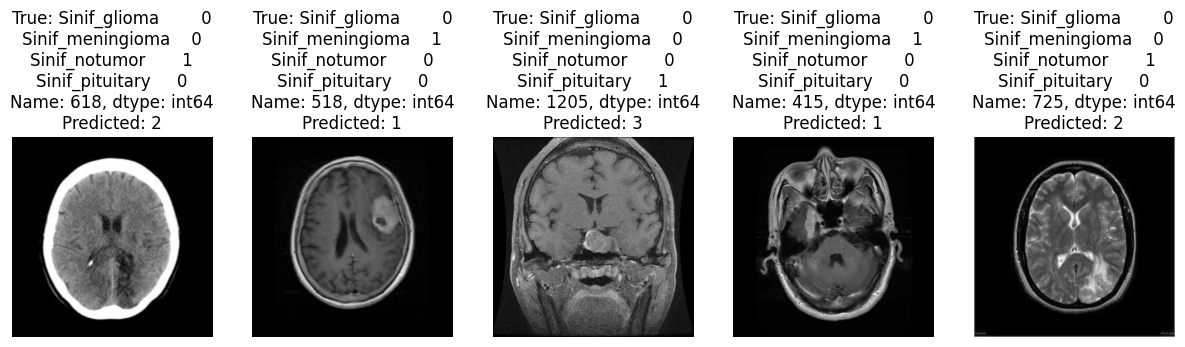

In [72]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(44)  # Set random seed for reproducibility
num_samples = 5
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

sample_images = X_test[random_indices]
sample_labels = y_test.iloc[random_indices]  # Use iloc for integer-based indexing

predictions = siniragi.predict(sample_images)

plt.figure(figsize=(15, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i],cmap = 'gray')  # Display the image
    plt.title(f'True: {sample_labels.iloc[i]}\nPredicted: {np.argmax(predictions[i])}')
    plt.axis('off')

plt.show()
